In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',150)

In [2]:
raw_df=pd.read_csv("https://raw.githubusercontent.com/Sreemanto/PGA-10-Data-Science/main/weatherAUS.csv")

In [3]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
raw_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)

<AxesSubplot:title={'center':'No. of Rows per year'}, xlabel='Date', ylabel='count'>

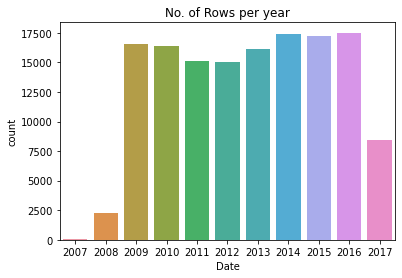

In [6]:
plt.title('No. of Rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [7]:
year=pd.to_datetime(raw_df.Date).dt.year

train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [8]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


# Input and Target Columns

In [49]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'

In [50]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()


In [51]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,24.0,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,19.0,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,26.0,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,28.0,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [52]:
val_inputs=val_df[input_cols].copy()
val_target=val_df[target_col].copy()

In [60]:
test_inputs=test_df[input_cols].copy()
test_target=test_df[target_col].copy()

In [61]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [62]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [63]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


# Inputing missing numeric values

In [64]:
from sklearn.impute import SimpleImputer

In [65]:
#where machine see and understand the task
imputer=SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [66]:
#executes the imputer
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [68]:
train_inputs[categorical_cols].isnull().sum()

Location          0
WindGustDir    6943
WindDir9am     7323
WindDir3pm     2030
RainToday      1000
dtype: int64

# Scaling Numeric Features

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler=MinMaxScaler().fit(raw_df[numeric_cols])

In [75]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [76]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


# Encoding categorical data

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore').fit(raw_df[categorical_cols])

In [79]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))

In [80]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [81]:
#train test and val were all derived from mother data df
#its important that we reset the index to zero for all of them as we will combine data later
train_inputs.reset_index(drop=True,inplace=True)
val_inputs.reset_index(drop=True,inplace=True)
test_inputs.reset_index(drop=True,inplace=True)


In [82]:
#Code which converts the encoded value to dummy and puts it in the dataframe
#pd.dataframe

In [84]:
train_inputs[encoded_cols]=pd.DataFrame(encoder.transform(train_inputs[categorical_cols]))
val_inputs[encoded_cols]=pd.DataFrame(encoder.transform(train_inputs[categorical_cols]))
test_inputs[encoded_cols]=pd.DataFrame(encoder.transform(train_inputs[categorical_cols]))


In [85]:
X_train=train_inputs[numeric_cols+ encoded_cols]
X_val=val_inputs[numeric_cols+ encoded_cols]
X_test=test_inputs[numeric_cols+ encoded_cols]



In [86]:
X_train.isnull().sum()

MinTemp                      0
MaxTemp                      0
Rainfall                     0
Evaporation                  0
Sunshine                     0
WindGustSpeed                0
WindSpeed9am                 0
WindSpeed3pm                 0
Humidity9am                  0
Humidity3pm                  0
Pressure9am                  0
Pressure3pm                  0
Cloud9am                     0
Cloud3pm                     0
Temp9am                      0
Temp3pm                      0
Location_Adelaide            0
Location_Albany              0
Location_Albury              0
Location_AliceSprings        0
Location_BadgerysCreek       0
Location_Ballarat            0
Location_Bendigo             0
Location_Brisbane            0
Location_Cairns              0
Location_Canberra            0
Location_Cobar               0
Location_CoffsHarbour        0
Location_Dartmoor            0
Location_Darwin              0
Location_GoldCoast           0
Location_Hobart              0
Location

# Training and Visualizing Decision Trees

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
model=DecisionTreeClassifier()

In [92]:
%%time
model.fit(X_train,train_targets)

Wall time: 3.5 s


DecisionTreeClassifier()

# Evaluation

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [94]:
train_preds=model.predict(X_train)

In [95]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [96]:
train_probs=model.predict_proba(X_train)

In [97]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Seems like the decision tree is quite confident about its predictions

Lets Check the accuracy of its predictions

In [99]:
accuracy_score(train_targets,train_preds)

0.9999797955307714

the training set accuracy is close to 100% But we cant rely solely on the training set accuracy, we must evaluate the model on the validation set too
We can make predictions and compute accuracy in one step using model.score

In [100]:
model.score(X_val,val_targets)

0.7758110382450235